# Python codes

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def pxy(a, b):
    '''
    Marginal distribution function. 
    This function can be used into both p(x|y) and p(y|x)
    '''
    return a * np.exp((-a)*b)

def densityfxy(a, b, B):
    '''
    Density function in an interval(0,B).
    This function can be used into both f(x|y) and f(y|x).
    '''
    return (b*np.exp((-a)*b))/(1-np.exp((-B)*b))

def cdffxy(a, b, B):
    '''
    Cumulative density function in an interval(0,B).
    This function can be used into both F(x|y) and F(y|x).
    '''    
    return (1-np.exp((-a)*b))/(1-np.exp((-B)*b))

def inversefxy(a ,B):
    '''
    Inverse function in an interval(0,B).
    This function can be used into both F^-1(p1|y) and F^-1(p1|x),
    where 0 < p1 < 1. 
    Let p1 be the r.v from uniform distribution. 
    '''
    p1 = random.uniform(0,1)
    return (-1/a)*(np.log(1-p1*(1-np.exp((-B)*a))))

In [2]:
# Gibbs sampling method
def gibbs(N, B, thin):
    matrix = np.zeros((N, 3))
    matrix[:,0] = np.arange(1,N+1)
    # select random numbers from uniform distribution
    x = random.uniform(0,1)
    y = random.uniform(0,1)
    for i in range(0, N):
        for j in range(0, thin):
            # generate updated x value 
            x = inversefxy(y,B)
            # generate updated y value
            y = inversefxy(x,B)
            # assign updated x,y values to column 2,3
            matrix[i,1:3] = [x,y]
    return matrix 

# 2

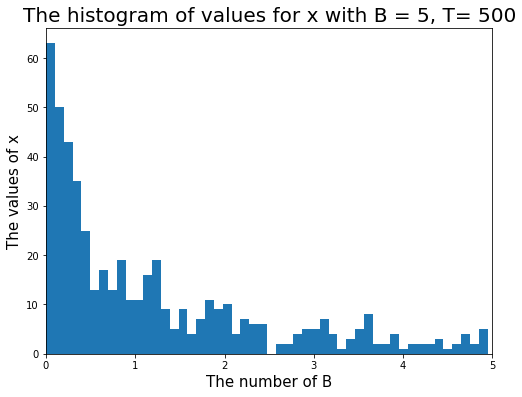

In [3]:
# Plot histogram with T = 500  
N, B, thin = 500, 5, 10
result1 = gibbs(N, B, thin)
plt.subplots(figsize=(8, 6))
plt.hist(result1[:,1], bins = 50)
plt.title ('The histogram of values for x with B = 5, T= 500',
           fontsize= 20)
plt.xlabel('The number of B', fontsize= 15)
plt.ylabel('The values of x', fontsize= 15)
plt.xlim(0,5)
plt.show()

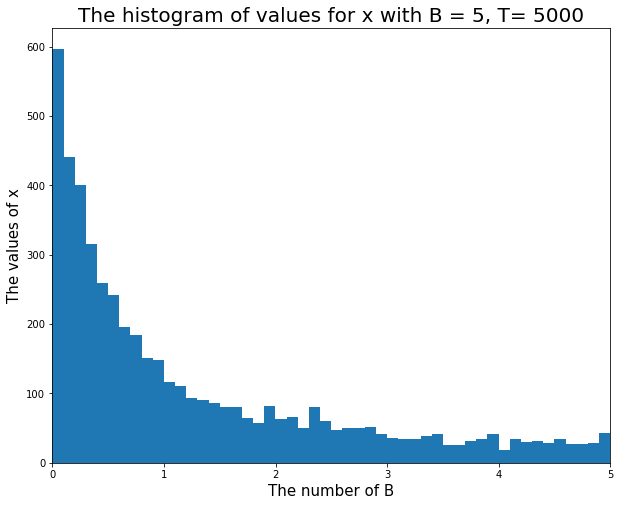

In [4]:
# Plot histogram with T = 5000  
N, B, thin = 5000, 5, 10
result2 = gibbs(N, B, thin)
plt.subplots(figsize=(10, 8))
plt.hist(result2[:,1],bins = 50)
plt.title ('The histogram of values for x with B = 5, T= 5000',
           fontsize= 20)
plt.xlabel('The number of B',fontsize= 15)
plt.ylabel('The values of x',fontsize= 15)
plt.xlim(0,5)
plt.show()

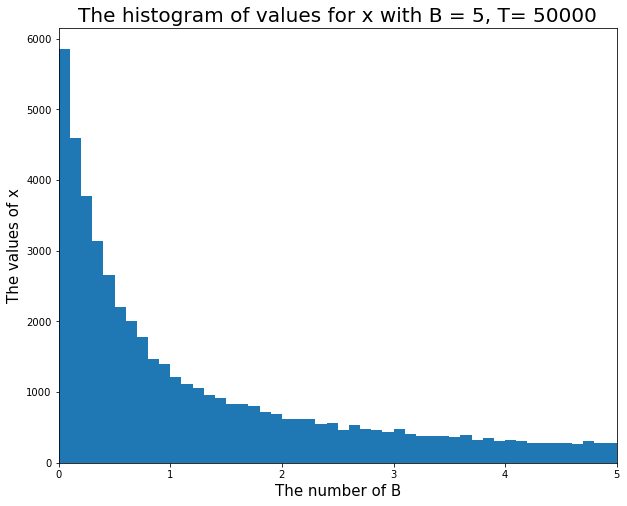

In [5]:
# Plot histogram with T = 50000  
N, B, thin = 50000, 5, 10
result3 = gibbs(N, B, thin)
plt.subplots(figsize=(10, 8))
plt.hist(result3[:,1],bins = 50)
plt.title ('The histogram of values for x with B = 5, T= 50000',
           fontsize= 20)
plt.xlabel('The number of B',fontsize= 15)
plt.ylabel('The values of x',fontsize= 15)
plt.xlim(0,5)
plt.show()

From these three histograms, we can see that as T inceases, the histograms become smoother.  

# 3.

In [18]:
random.seed(200)
result500 = gibbs(500,5,10)
result5000 = gibbs(5000,5,10)
result50000 = gibbs(50000,5,10)

# calulate the means from each iterations.
estimated_expectation_500 = np.mean(result500[:,1])
estimated_expectation_5000 = np.mean(result5000[:,1])
estimated_expectation_50000 = np.mean(result50000[:,1])


In [19]:
estimated_expectation_500

1.2776584241390458

In [20]:
estimated_expectation_5000

1.2662195687732802

In [21]:
estimated_expectation_50000

1.2584644918562236

As we can see from the results, the expection changes 1.277658 to 1.266219 to 1.258464 by using 500, 5000 and 5000 samples respectively. The expectation become stable as T increases like 500, 5000 and 50000 samples from the sampler. We can see this trend by using graphs. 

In [25]:
# define function do simulation and make graph at the same time
# the function takes T times as argument
def simulation_and_graph(N):
    simulation_matrix = np.zeros((N,3))
    simulation_matrix[:,0] = np.arange(N)
    simulation = gibbs(N, 5, 10)
    for i in range(N):
        mean = np.mean(simulation[0:i+1,1])
        var =  np.var(simulation[0:i+1,1])/np.sqrt(i+1)
        simulation_matrix[i,1:3] = [mean, var]
        
    plt.subplots(figsize=(6, 4))    
    plt.plot(simulation_matrix[:,1], label = 'mean', color = 'orange')
    plt.title ('The trend of changes in mean',fontsize= 15)
    plt.xlabel('N times',fontsize= 10)
    plt.ylabel('Value',fontsize= 10)
    plt.legend(loc='upper right')
    plt.ylim(0,2)
    plt.legend   
    
    plt.subplots(figsize=(6, 4))
    plt.plot(simulation_matrix[:,2], label = 'Variance')
    plt.title ('The trend of changes in Variance',fontsize= 15)
    plt.xlabel('N times',fontsize= 10)
    plt.ylabel('Value',fontsize= 10)
    plt.legend(loc='upper right')
    plt.ylim(0,0.5)
    plt.legend

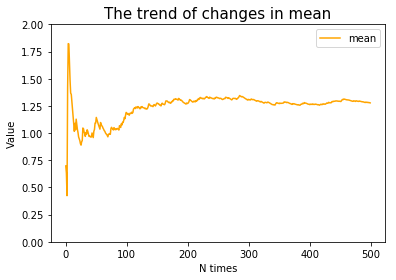

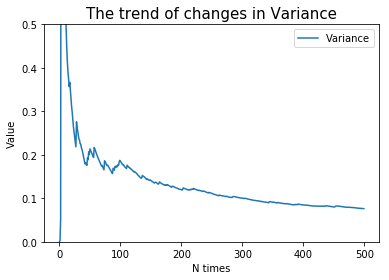

In [29]:
# T = 500
random.seed(200)
simulation_and_graph(500)

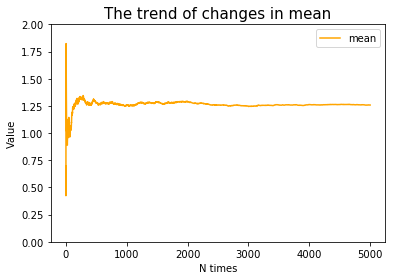

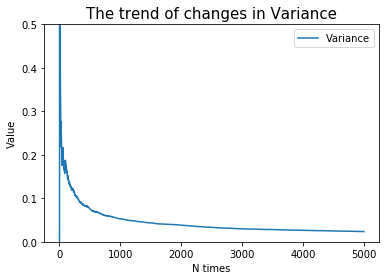

In [30]:
# T = 5000
random.seed(200)
simulation_and_graph(5000)

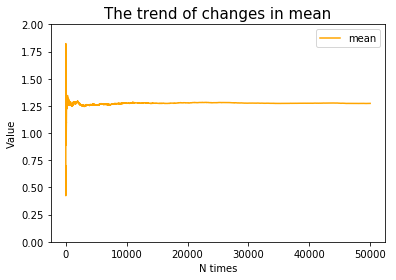

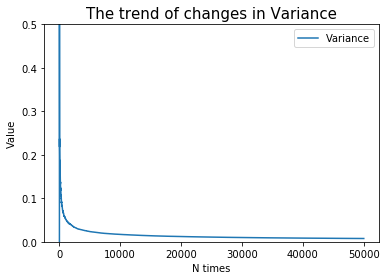

In [31]:
# T = 500
random.seed(200)
simulation_and_graph(50000)

As you see in the above graphs that shows how means and variance change as T increases, the trand of mean and varianve varies a lot at first and becomes stable and converges. Especially variance becomes small as T increases. 